In [1]:
# modules
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# helper functions
def f(x, y):
    return ((1-x)**2) + (100*(y-x**2)**2)

def get_rosenbrock_params(x, y):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    return X,Y,Z

def grad_f(vector):
    x, y = vector
    df_dx = (400*x**3) - (400*x*y) + (2*x) + 2
    df_dy = (200*y) - (200*x**2)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1.5,1.5,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

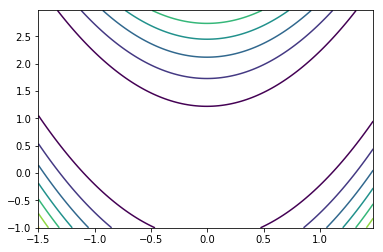

In [3]:
# 2. Create a visualization of the contours of the Rosenbrock function
delta = 0.025
X,Y,Z = get_rosenbrock_params(np.arange(-1.5, 1.5, delta), np.arange(-1.0, 3.0, delta))
# X,Y,Z = get_rosenbrock_params(np.arange(-10, 10, delta), np.arange(-10, 10, delta))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
# ax.set_xlim([-1.5,1.5])
# ax.set_ylim([-1.0,3.0])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


(-1.0, 3)

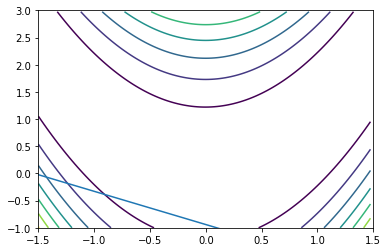

In [4]:
# 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.
np.random.seed(10)
traj = grad_descent(iterations=20,learning_rate=1e-1)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[:,0]
y = traj[:,1]
plt.plot(x,y,'-o')
plt.xlim(-1.5,1.5)
plt.ylim(-1.0,3)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


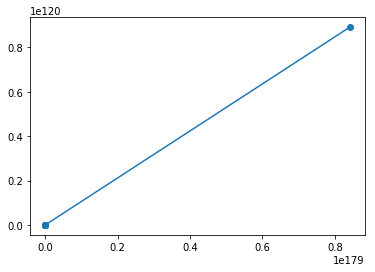

In [5]:
# 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5) # if alpha value is getting closer to 1; it's almost same as not using momentum
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')